# Lab Assignment Three: Extending Logistic Regression

### Authors
- Juliana Antonio
- Xiaona Hang
- Chuanqi Deng


### 1. Preparation and Overview

The "Body Performance Data" sourced from the [Korea Sports Promotion Foundation](https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=ace0aea7-5eee-48b9-b616-637365d665c1), available on Kaggle, comprises 13,393 rows and encompasses 12 features, such as age, gender, height, weight, and more. This dataset, meticulously curated, demonstrates the correlation between age and various exercise performance metrics, thereby providing insights into individual performance grades.

Utilizing this rich dataset, the aim is to classify individuals into distinct performance grades: A (Best), B, C, and D (Worst), based on the aforementioned 12 features. This classification is pivotal for tailoring personalized training plans, catering to diverse needs and abilities. Consequently, gyms and rehabilitation centers stand to benefit significantly from leveraging predictive analytics to craft bespoke training plans, optimizing clients' progress and well-being.

Beyond professional institutions, individuals themselves will be interested in understanding their body performance classification. Armed with this knowledge, they can make informed decisions regarding their fitness journey, setting realistic goals and embracing tailored approaches for holistic improvement.

The deployment of a robust classification model is expected to achieve an accuracy of approximately 80%. By meeting this benchmark, the model ensures reliable predictions, empowering stakeholders to make data-driven decisions with confidence.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from tqdm import tqdm

raw_data = pd.read_csv("data/bodyPerformance.csv")

# preprocessing
data = pd.get_dummies(raw_data, columns=['gender'],dtype=np.int8) # one-hot encoding for gender
labels = data['class'].map(lambda c: ord(c) - ord('A')) # encode lables into integer
data.drop(['class'], axis=1, inplace=True) # remove class column

# scale
scaler = StandardScaler()
features = scaler.fit_transform(data)

# PCA
pca = PCA(8)
pca_feature = pca.fit_transform(features)
raw_data.shape, pca_feature.shape

((13393, 12), (13393, 8))

The dataset has one categorical feature, the gender. One-hot encoding is enployed to convert it into numerical data. Next, the lables/class is moved to another separate variable, lables. Then, the Standard Scaling and PCA are applied to mitigate the difference of multiple features reduce the number of features from 12 to 8.

In [3]:
# breakdown of the variables
pd.DataFrame(pca_feature).describe()

0             1             2             3             4  \
count  1.339300e+04  1.339300e+04  1.339300e+04  1.339300e+04  1.339300e+04   
mean  -1.252058e-16  2.387398e-17 -2.546558e-17  4.827850e-17 -6.260288e-17   
std    2.386378e+00  1.462662e+00  1.127011e+00  9.438121e-01  8.081770e-01   
min   -5.041796e+00 -5.384663e+00 -7.437324e+00 -4.140902e+00 -4.012083e+00   
25%   -1.967484e+00 -1.012307e+00 -6.911124e-01 -6.042082e-01 -4.971976e-01   
50%   -8.995369e-01  1.073930e-01  5.143689e-02  1.506179e-02  7.247022e-03   
75%    2.360703e+00  1.072822e+00  7.628835e-01  6.133066e-01  5.253231e-01   
max    6.506510e+00  7.782459e+00  1.473913e+01  4.345014e+00  1.360873e+01   

                  5             6             7  
count  1.339300e+04  1.339300e+04  1.339300e+04  
mean  -2.652665e-19 -1.061066e-17  6.313342e-17  
std    5.785046e-01  5.602344e-01  4.860709e-01  
min   -2.242237e+00 -5.062883e+00 -2.246422e+00  
25%   -3.845767e-01 -3.517389e-01 -3.142285e-01  
50%    1.665698e-02  8.867419e-03 -3.037003e-03  
75%    3.905508e-01  3.792356e-01  3.000243e-01  
max    3.636507e+00  5.873632e+00  6.967697e+00

In [2]:
# test different folds of cross validation
cross_validation_accs = {}
# n fold cross-validation, n: 3-10
for n in tqdm(range(3, 11)):
    # n-fold cross-validation
    cross_validator = KFold(n_splits=n)
    split_indices = cross_validator.split(pca_feature, labels)
    
    # training and testing
    avg_accs = []
    for train_indices, test_indices in split_indices:
        X_train, y_train = pca_feature[train_indices], labels[train_indices]
        X_test, y_test = pca_feature[test_indices], labels[test_indices]
        
        classifier = SVC()
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        avg_accs.append(acc)
    
    cross_validation_accs[n] = avg_accs

100%|██████████| 8/8 [01:58<00:00, 14.79s/it]


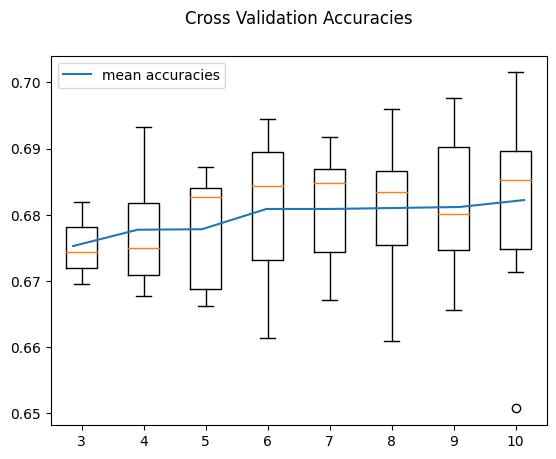

In [15]:
# plot cross validation accuracies
plt.boxplot(cross_validation_accs.values(), labels=list(range(3, 11)))
ax = plt.twiny()
avg_accs = [np.mean(accs) for accs in cross_validation_accs.values()]
ax.plot(avg_accs, label='mean accuracies')
ax.set_axis_off()
ax.legend(loc = 'upper left')
plt.title("Cross Validation Accuracies");

According to the graph above, it is clear that the 7-fold cross-validation has the best accuracies, considering the stablity and median accuracy. Hence, a rougly 86/14 split would be ideal for this dataset.

In [4]:
# use the optimal number of folds for the following analysis
cross_validator = KFold(n_splits=7)
split_indices = cross_validator.split(pca_feature, labels)

References:
1. https://www.kaggle.com/datasets/kukuroo3/body-performance-data
2. https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=ace0aea7-5eee-48b9-b616-637365d665c1